<center>
    <h1>Работа 5.8.1</h1>
    <h2>Определение постоянных Стефана–Больцмана и Планка из анализа теплового излучения накаленного тела</h2>
</center>
<br>
<hr>
<br>
<br>
<br>
<br>
<br>
<p style="text-align:right">
    Работу выполнил<br>
    студент группы Б02-012н<br>
    <b>Захаров Лев</b><br>
    Преподаватель:<br>
    <b>Светличный Александр Олегович</b><br>
</p>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<hr>
<p style="text-align:center">
    Долгопрудный 2022
</p>
<hr>

<h2>1. Аннотация</h2>
<hr>
<br>
<p style="text-align:justify">
    При помощи модели АЧТ проводятся измерения температуры пирометром и термопарой, исследуется излучение накаленных тел с различной испускательной способностью, определяются постоянные Планка и Стефана–Больцмана.
<p>

<h2>2. Теоретическое введение</h2>
<hr>
<br>
<p style="text-align:justify">
    Основным объектом наблюдения в работе является нить накала лампы. Если предположить, что нить излучает как серое тело, то зависимость мощности излучения от температуры описывается соотношением:
</p>
<p style="text-align:center">
    \begin{equation}
        W = \varepsilon_T \sigma S T^4,
    \end{equation}
</p>
<p style="text-align:justify">
    где учтено, что реально температура вольфрама намного выше температуры окружающей среды. Здесь $\varepsilon_T$ – поправочный коэффициент излучения для вольфрама <b>[2]</b>, $\sigma$ – постоянная Стефана-Больцмана, S – площадь нити, T – её термодинамическая температура.
</p>
<p style="text-align:justify">
    Постоянная планка выражается через постоянную Стефана-Больцмана следующим образом <b>[3]</b>:
</p>
<p style="text-align:center">
    \begin{equation}
        h = \sqrt[3]{\frac{2 \pi^5 k_Б^4}{15 c^2 \sigma}}
    \end{equation}
</p>

<h2>3. Экспериментальная установка</h2>
<hr>
<br>
<p style="text-align:justify">
    Экспериментальная установка (рис. 1) состоит из пирометра 9, модели АЧТ, трех исследуемых образцов (18, 19, 20), блока питания (1) и цифровых вольтметров.
</p>
<p style="text-align:right">
    <img src=" 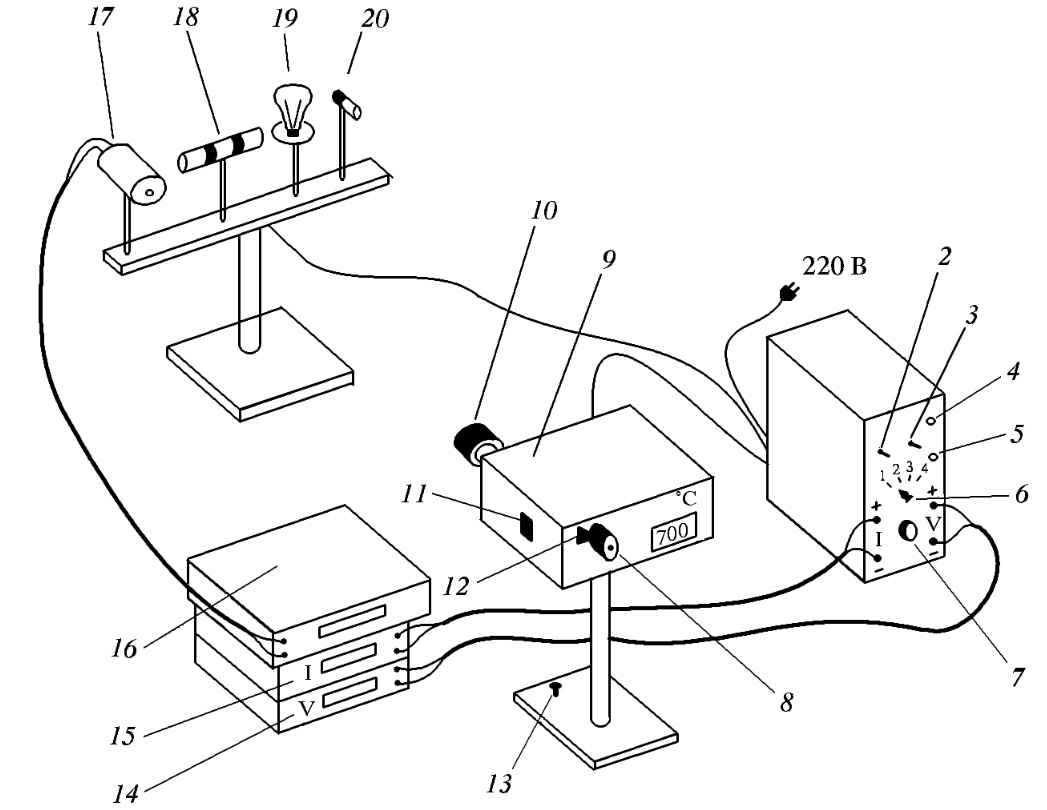" title="Рис.1 Экспериментальная установка."/>
    Рис.1 Экспериментальная установка
</p>

<h2>4. Результаты работы</h2>
<hr>
<br>
<p style="text-align:justify">
    Пирометр был откалиброван с помощью модели АЧТ и термопары. Сравнение температур, полученных этими двумя приборами показало, что погрешность определения температуры составляет $\varepsilon_T = 1,1\% $
</p>
<p style="text-align:justify">
    Пирометр был откалиброван с помощью модели АЧТ и термопары. Сравнение температур, полученных этими двумя приборами показало, что погрешность определения температуры составляет $\varepsilon_T = 1,1\% $
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

raw_data = pd.read_csv("Data.csv", dtype = {'T':int, 'U':np.float64, 'I':np.float64}, decimal = ',')

<p style="text-align:justify">
    Для проверки закона Стефана-Больцмана необходимо перевести измеренную яркостную температуру в термодинамическую, используя рисунок ниже
</p>
<p style="text-align:right">
    <img src=" 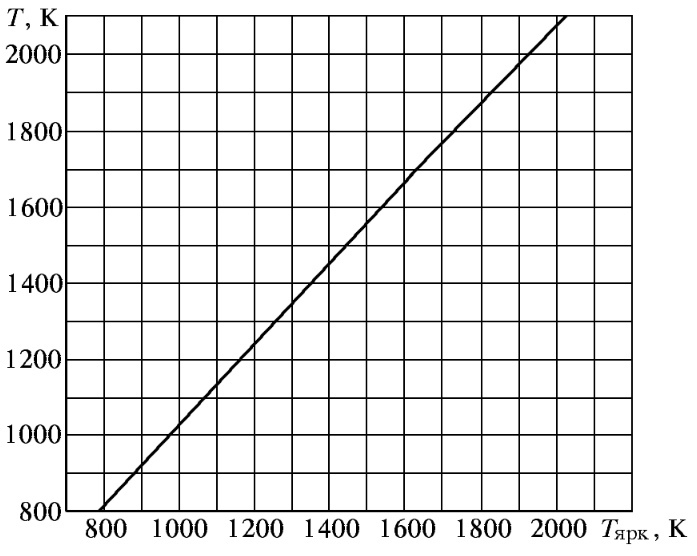" title="Рис.2 График связи яркостной температуры и термодинамической для вольфрама."/>
    Рис.2 График связи яркостной температуры и термодинамической для вольфрама.
</p>

<p style="text-align:justify">
    Результаты измерения температуры нити накала, а также силы тока через неё и напряжения на ней
представлены в таблице 1.
</p>

In [2]:
def L(x, k, b):
    return k*x + b

Cal_x = [800, 1000, 1200, 1400, 1600, 1800, 2000]
Cal_y = [815, 1035, 1250, 1460, 1670, 1880, 2090]

popt, pcov = curve_fit(L, Cal_x, Cal_y)
k, b = map(float, popt)

data_T = list(map(lambda T: k*T + b, raw_data['T']))
data_P = list(map(lambda x, y: x*y, raw_data['I'], raw_data['U']))

d = {'T lum., °C': raw_data['T'],
     'T temp., °C': data_T,
     'I, A': raw_data['I'],
     'U, V': raw_data['U'],
     'P, W': data_P}

current_data = pd.DataFrame(data = d)
display(current_data)

,"T lum., °C","T temp., °C","I, A","U, V","P, W"
0,900,927.232143,0.650,19.64,12.76600
1,950,980.223214,0.667,21.08,14.06036
2,1000,1033.214286,0.704,24.10,16.96640
3,1050,1086.205357,0.747,27.21,20.32587
4,1100,1139.196429,0.786,31.91,25.08126
5,1150,1192.187500,0.812,33.26,27.00712
6,1200,1245.178571,0.851,36.52,31.07852
7,1250,1298.169643,0.905,41.74,37.77470
8,1300,1351.160714,0.953,46.21,44.03813
9,1350,1404.151786,1.011,51.29,51.85419


<p style="text-align:right">
    Таблица 1. Изучение нити накала
</p>
<p style="text-align:justify">
    Результаты представлены в виде графиков 1 и 2 - графиков зависимости $P=f(T)$ и $ln(P)=g(ln(T))$
</p>

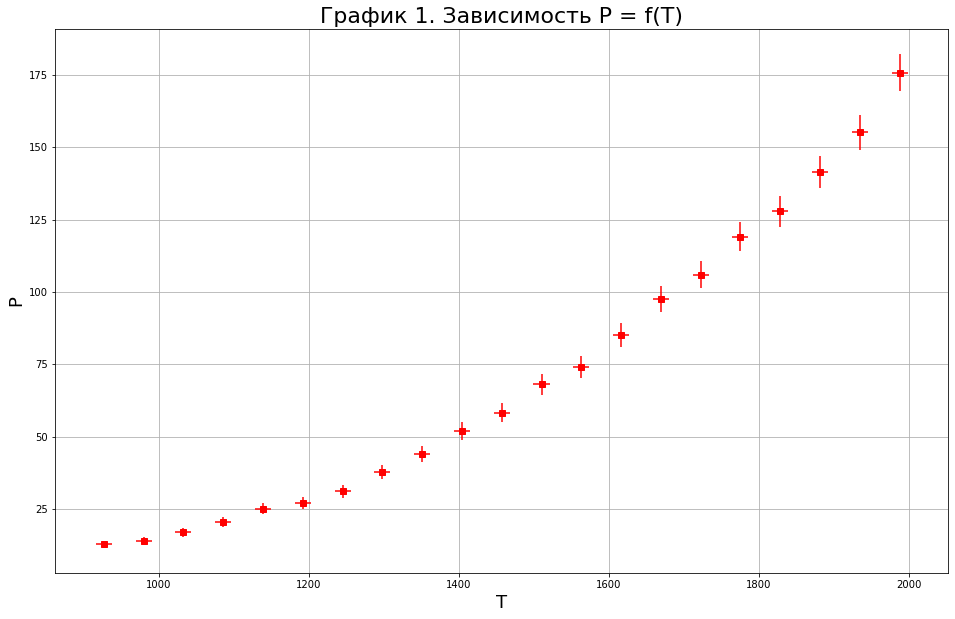

In [3]:
perr = np.sqrt(np.diag(pcov))
T = current_data['T temp., °C']
P = current_data['P, W']
dT = perr[1] + 5.0
dP = list(map(lambda I, U: 0.05*U + 0.5*I, raw_data['I'], raw_data['U']))

plt.figure(figsize=(16, 10))

plt.errorbar(T, P, yerr = dP, xerr = dT, fmt = 'rs')
plt.grid(visible=1, which='both', axis='both')
plt.title('График 1. Зависимость P = f(T)', fontsize=22)
plt.xlabel('T', fontsize = 18)
plt.ylabel('P', fontsize = 18)
plt.show()

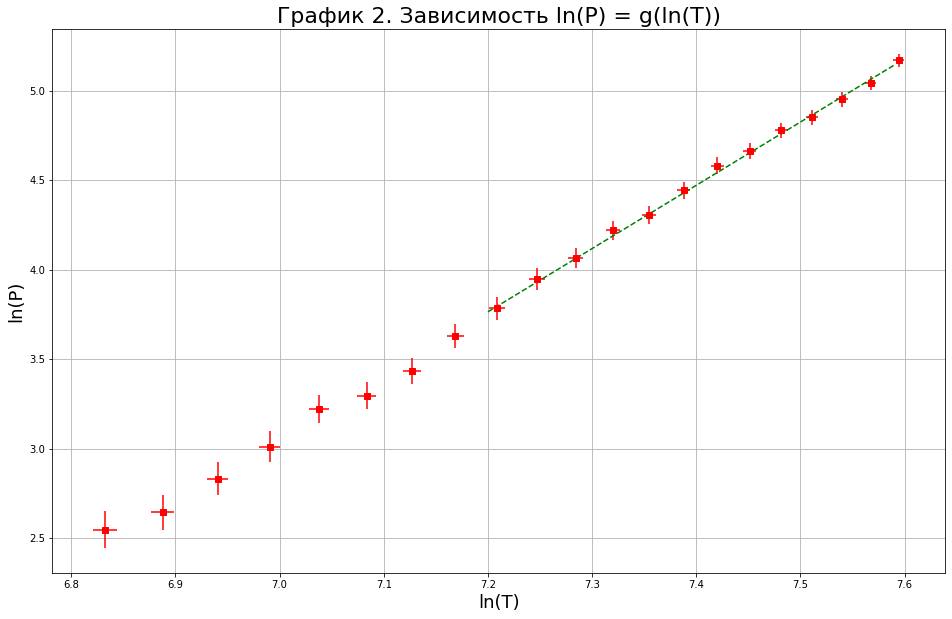

3.5362087567465776 0.03221544793096136


In [5]:
lnT = np.log(T)
lnP = np.log(P)
dlnT = dT / T
dlnP = dP / P
popt, pcov = curve_fit(L, lnT, lnP)
perr = np.sqrt(np.diag(pcov))
k, b = map(float, popt)
dk, db = map(float, perr)

x_l = np.array([i for i in range(720, 760)])
x_l = x_l / 100
y_l = k * x_l + b

plt.figure(figsize=(16, 10))

plt.plot(x_l, y_l, 'g--')
plt.errorbar(lnT, lnP, yerr = dlnP, xerr = dlnT, fmt = 'rs')
plt.grid(visible=1, which='both', axis='both')
plt.title('График 2. Зависимость ln(P) = g(ln(T))', fontsize=22)
plt.xlabel('ln(T)', fontsize = 18)
plt.ylabel('ln(P)', fontsize = 18)
plt.show()

print(k, dk)

<p style="text-align:justify">
    Угловой коэффициент прямой оказался $n = 3.54 ± 0.03$, что расходится с значением, полученным из закона Стефана-Больцмана. Этот результат объясняется тем, что нить накаливания отводит тепло не только излучением, но и теплопередачей, что эффективно снижает значение $n$
</p>
<p style="text-align:justify">
    Для каждого значения $𝑇_терм$, превышающего 1700 К была найдена величина постоянной Стефана-Больцмана
</p>
<p style="text_align:center">
    \begin{equation}
        \sigma_{1700K} = (1,35 \pm 0.14) \cdot 10^{-6} \frac{Вт}{м^2K^4};
    \end{equation}
</p>
<p style="text_align:center">
    \begin{equation}
        \sigma_{1800K} = (1,25 \pm 0.11) \cdot 10^{-6} \frac{Вт}{м^2K^4};
    \end{equation}
</p>
<p style="text_align:center">
    \begin{equation}
        \sigma_{1900K} = (1,15 \pm 0.10) \cdot 10^{-6} \frac{Вт}{м^2K^4};
    \end{equation}
</p>
<p style="text-align:justify">
    Ни одно из значений постоянной Стефана-Больцмана не совпадает с реальным по порядку величины. Причина этому - серьёзное влияние отвода тепла от нити накаливания посредством теплообмена. По лучшему значению посчитаем величину постоянной Планка:
</p>
<p style="text_align:center">
    \begin{equation}
        h = (2.42 \pm 0.07) \cdot 10^{-27} Дж \cdot с;
    \end{equation}
</p>
<p style="text_align:justify">
    С помощью пирометра была измерена яркостная температура неоновой лампы: $T_неон = 850±10 °С$. Эта температура не соответствует реальности, так как неоновая лампа светится за счёт создания тлеющего разряда, вещество в котором (ионизированный газ) не находится в равновесии с излучением, что не соответствует модели АЧТ.

<h2>5. Вывод</h2>
<hr>
<br>
<p style="text-align:justify">
    Анализ значений величин показал, что предложенные модели являются недостаточно точными, чтобы учесть все теплообменные процессы. Так как АЧТ - модель идеальная, то реальные приборы не могут являться хорошей демонстрацией абсолютно чёрных тел. Значения постоянной Стефана-Больцмана и постоянной Планка не совпали по порядку величины, что демонстрирует непригодность данных лабораторных условий для определения этих величин.
</p>